# LEAD SCORING CASE STUDY

### Step 1: Importing and Merging Data

In [87]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [88]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
# Importing seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
# Importing dataset
leads_data = pd.read_csv("Leads.csv")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the Dataframe

In [90]:
# Let's see the head of our master dataset
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [91]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [92]:
leads_data.shape

(9240, 37)

### Step 3: Data Cleaning

In [93]:
## Checking for null value percentage
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [94]:
# Dropping columns with null values greater than 30%
leads_df=leads_data.drop(['Tags','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                          'Asymmetrique Profile Score'],axis=1)

In [95]:
# Checking the shape of new data frame
leads_df.shape

(9240, 31)

In [96]:
#Printing the Null Percentage
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [97]:
# Treating columns having level as "Select", as it is as equal as a null value.
# Replacing "Select" with nan in the columns having "Select" value.
leads_df=leads_df.replace("Select", np.nan)

In [98]:
## Checking for null values after replacing 'Select' value with nan
round(100*(leads_df.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [99]:
# Dropping columns with null values greater than 30%
leads_df=leads_df.drop(['Specialization','How did you hear about X Education','Lead Profile','City'],axis=1)

In [100]:
round(100*(leads_df.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [101]:
# Missing value treatment on categorical and continous variables having null/missing values:
leads_df['TotalVisits'] = leads_df['TotalVisits'].fillna(leads_df['TotalVisits'].median())
leads_df['Page Views Per Visit'] = leads_df['Page Views Per Visit'].fillna(leads_df['Page Views Per Visit'].median())
leads_df['Lead Source'] = leads_df['Lead Source'].fillna(leads_df['Lead Source'].mode().iloc[0])
leads_df['Last Activity'] = leads_df['Last Activity'].fillna(leads_df['Last Activity'].mode().iloc[0])
leads_df['Country'] = leads_df['Country'].fillna(leads_df['Country'].mode().iloc[0])
leads_df['What matters most to you in choosing a course'] = leads_df['What matters most to you in choosing a course'].fillna(leads_df['What matters most to you in choosing a course'].mode().iloc[0])


In [102]:
# Checking for missing values after imputation:
round(100*(leads_df.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                           0.00
What is your current occupation                  29.11
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

# EDA

In [103]:
leads_df.shape

(9240, 27)

In [104]:
leads_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [105]:
# Dropping columns having one type of input which is not helpful:
leads_df=leads_df.drop(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                      'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                       'A free copy of Mastering The Interview'],axis=1)

In [106]:
leads_df.shape

(9240, 15)

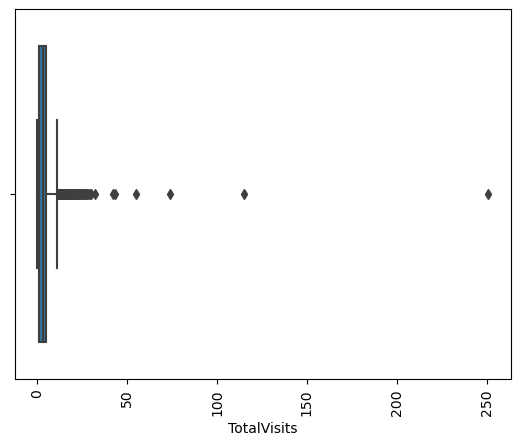

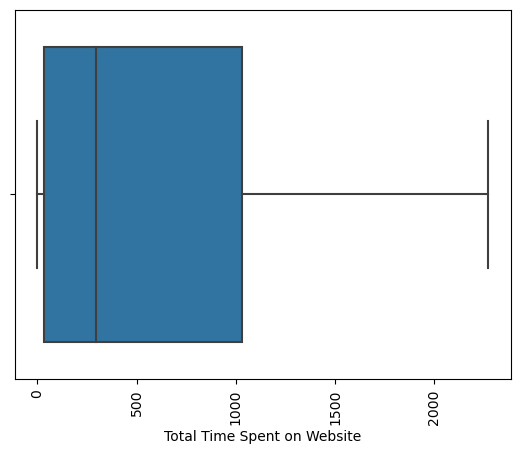

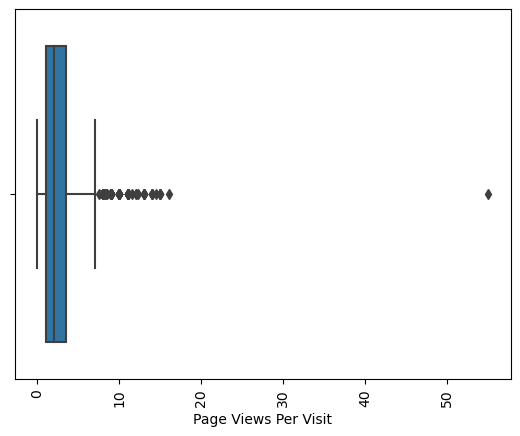

In [107]:
for i in cont_cols:
    sns.boxplot(x= df[i])
    plt.xticks(rotation=90)
    plt.show()

In [108]:
# Segmentation of the Dataset
id_cols = ['Prospect ID','Lead Number']
cont_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
cat_cols = ['Lead Origin','Lead Source','Do Not Email','Last Activity','Country','What is your current occupation','What matters most to you in choosing a course','Last Notable Activity']
target_col = ['Converted']

In [109]:
# Dropping null values from 'What is your current occupation' column:
leads_df.dropna(subset=['What is your current occupation'], inplace=True)

In [110]:
leads_df.shape

(6550, 15)

# Outlier detection

TotalVisits


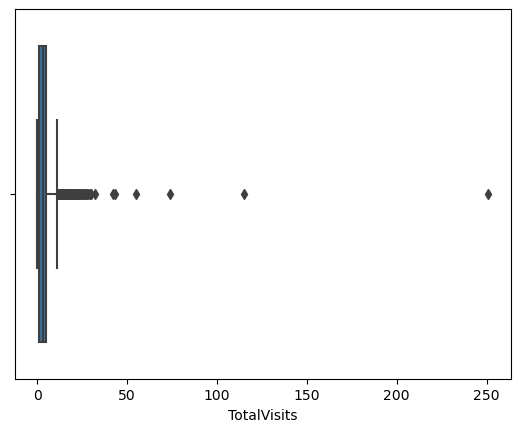

Total Time Spent on Website


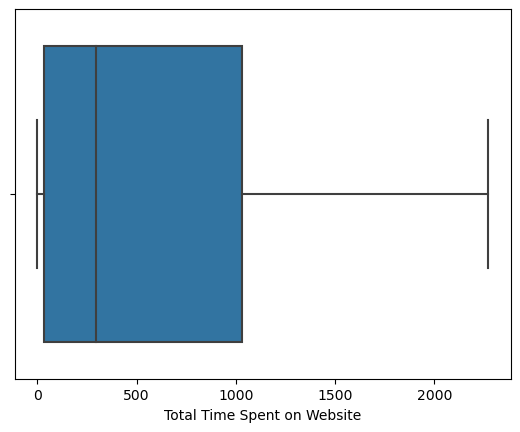

Page Views Per Visit


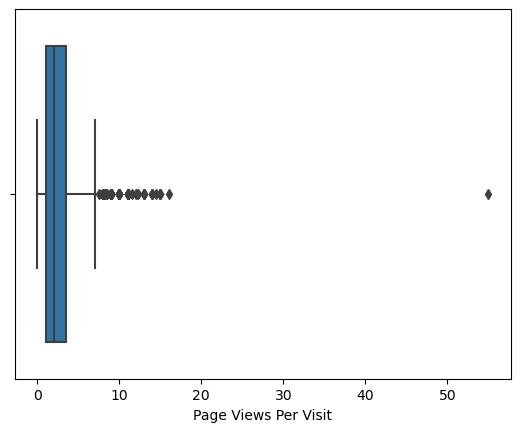

In [111]:
for i in cont_cols:
    print(i)
    sns.boxplot(x=leads_df[i])
    plt.show()

# Univariate Analysis

TotalVisits


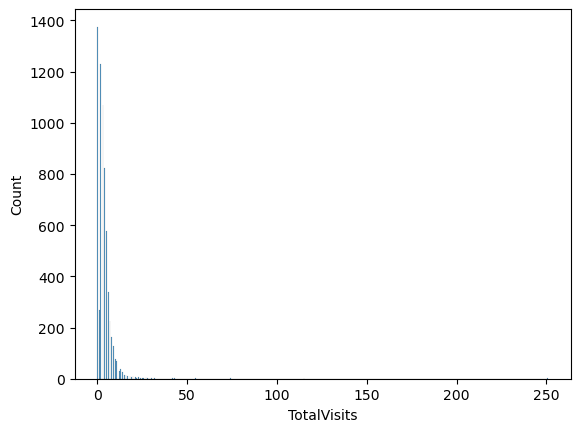

Total Time Spent on Website


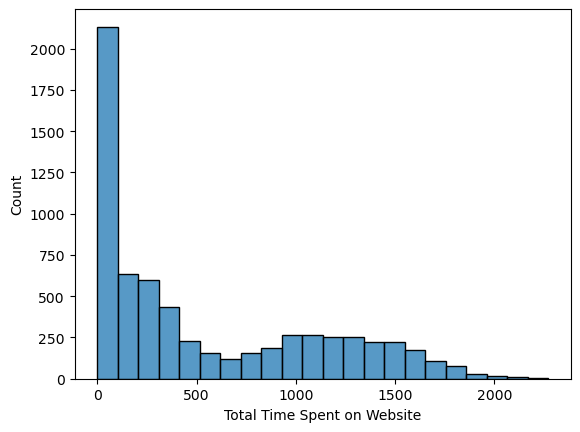

Page Views Per Visit


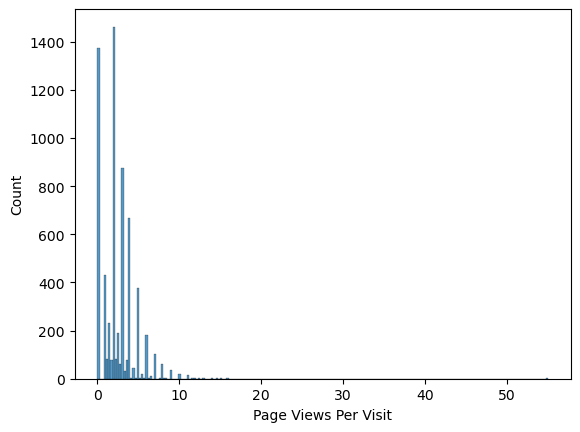

In [112]:
for i in cont_cols:
    print(i)
    sns.histplot(x=leads_df[i])
    plt.show()

Lead Origin


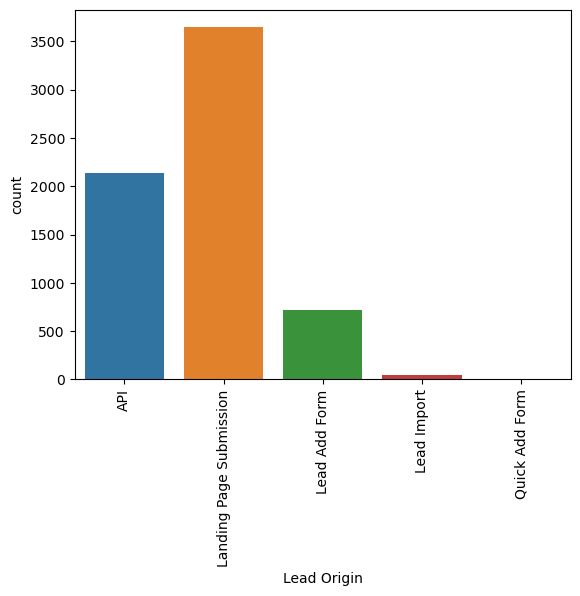

Lead Source


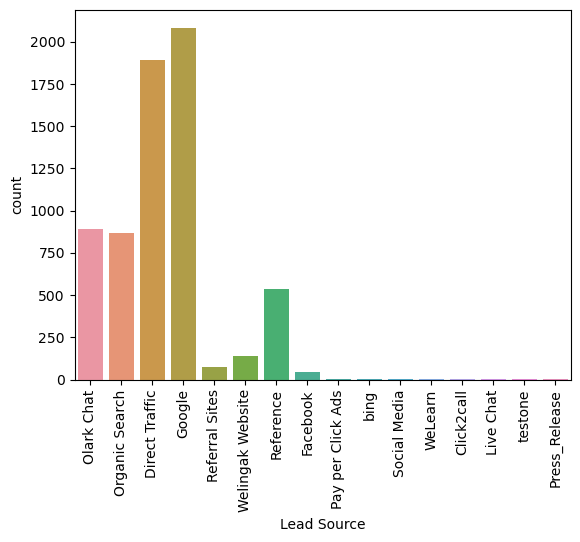

Do Not Email


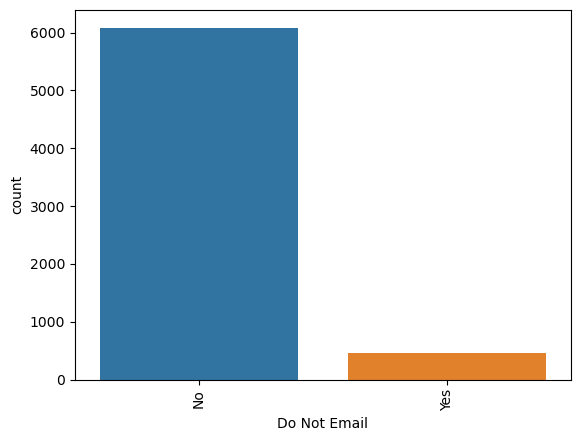

Last Activity


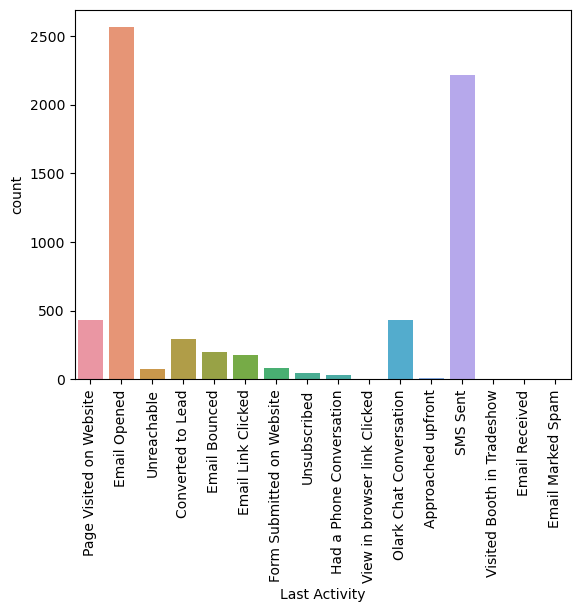

Country


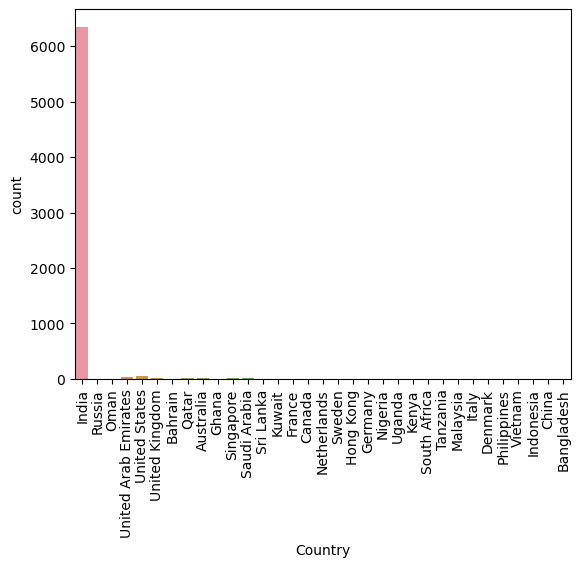

What is your current occupation


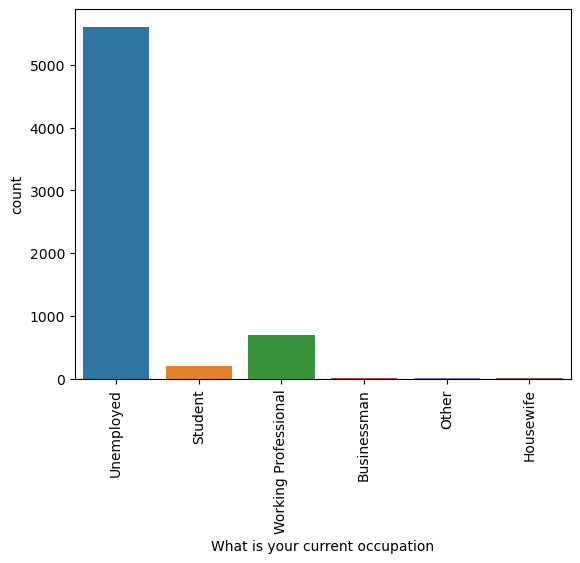

What matters most to you in choosing a course


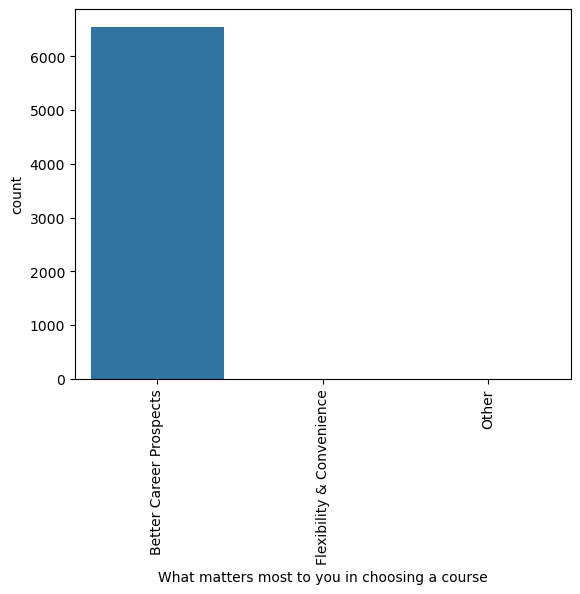

Last Notable Activity


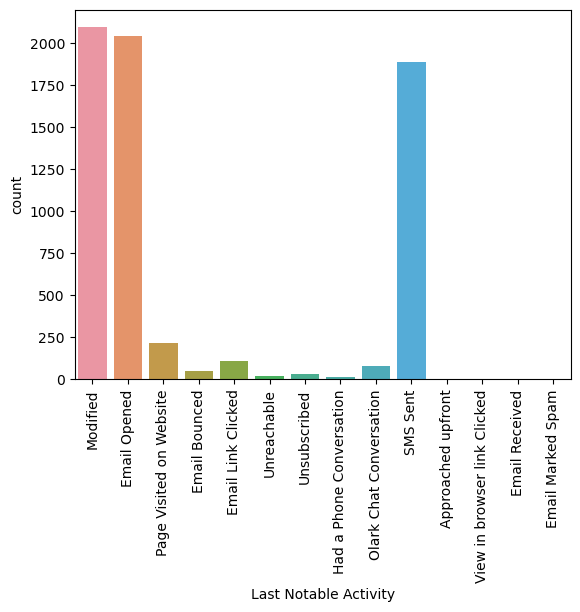

In [113]:
for i in cat_cols:
    print(i)
    sns.countplot(x=leads_df[i])
    plt.xticks(rotation=90)
    plt.show()

Inference from Univariate Analysis

In [114]:
# 1. Maximum users are from 'India'
# 2. Most of the users are 'Unemployed'
# 3. 'Email opened' is the last activity for most of the users.
# 4. Most of the users are choosing the course
# 5. 'Modified' is the last notable activity for most of the users.
# 6. 'Google' is the lead source for most of the users.

# Bivariate Analysis

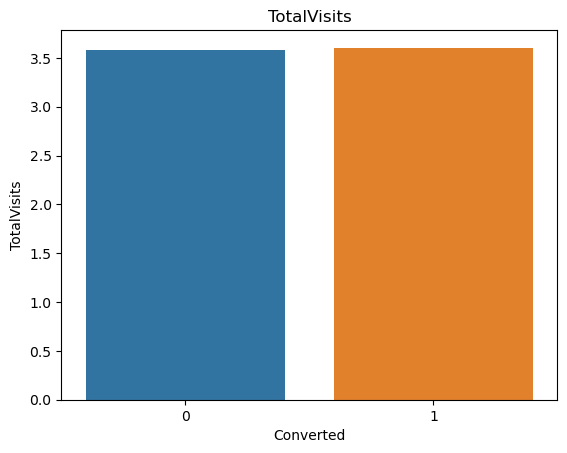

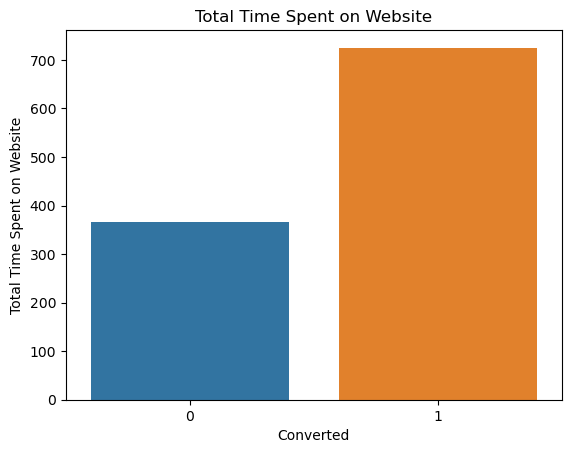

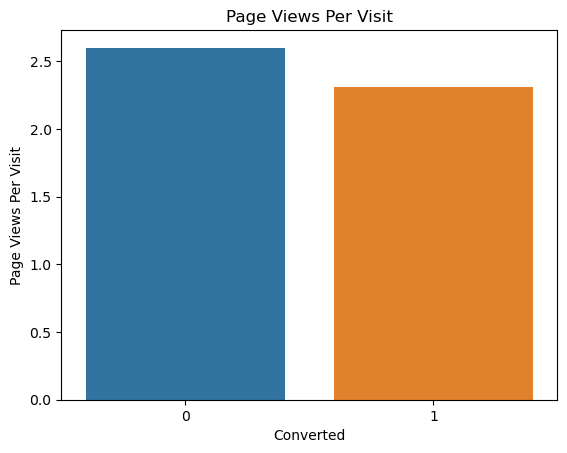

In [115]:
for col in cont_cols:
    sns.barplot(x=leads_df['Converted'], y=leads_df[col], ci=None)
    plt.title(col)
    plt.show()

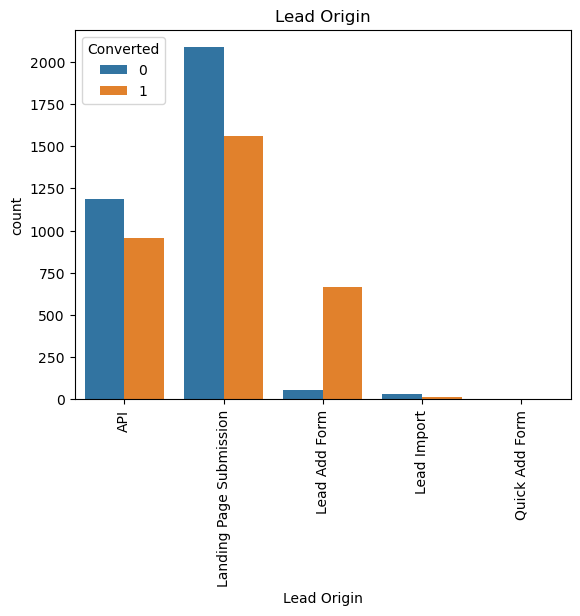

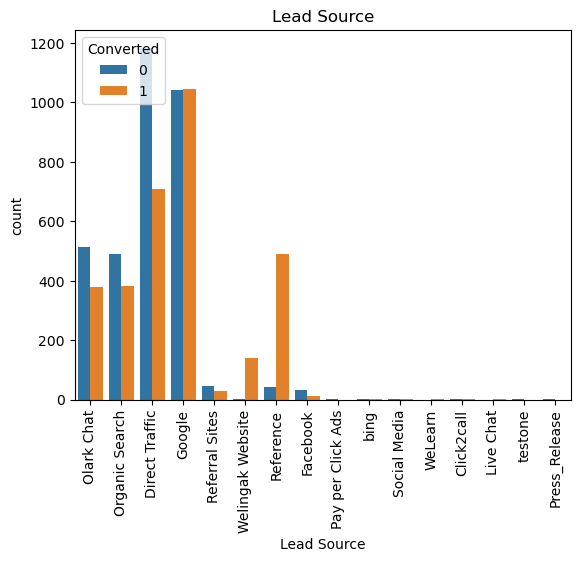

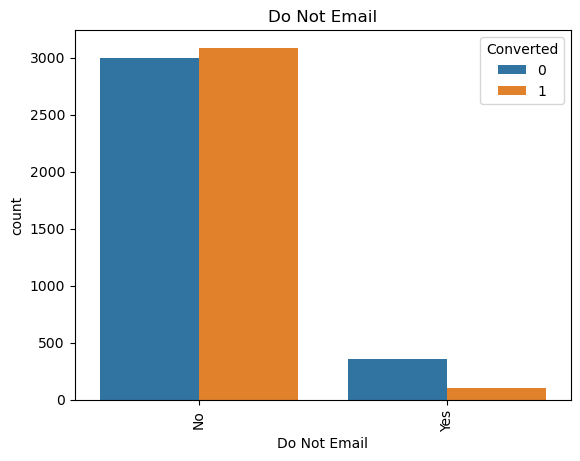

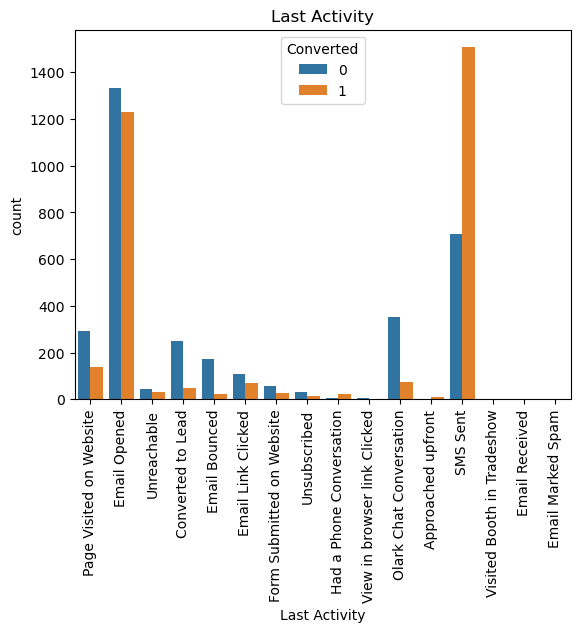

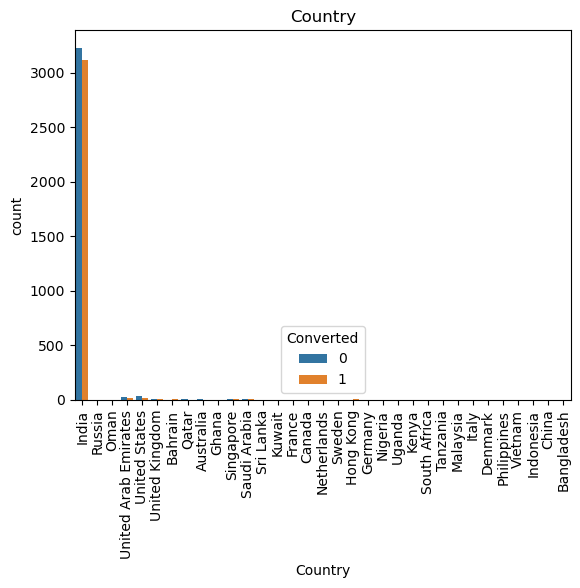

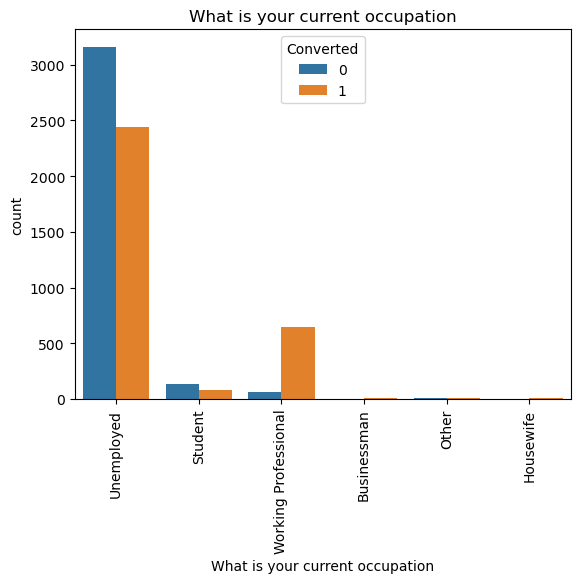

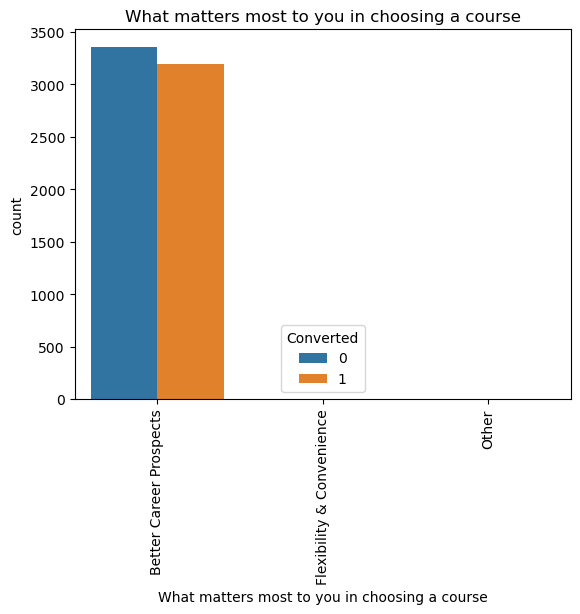

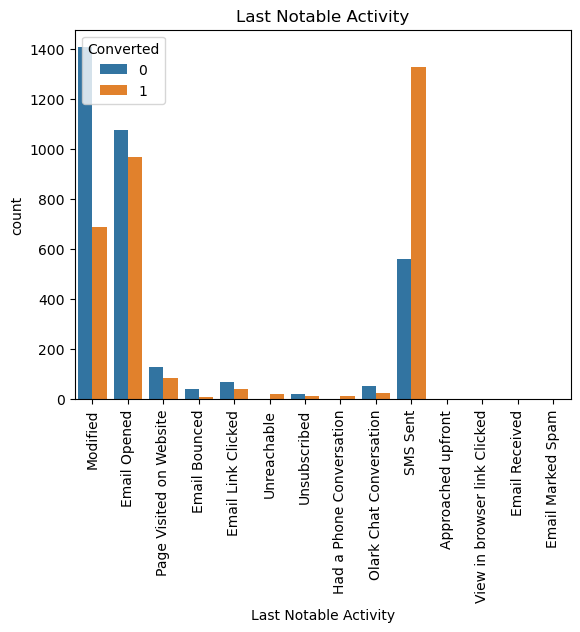

In [116]:
for col in cat_cols:
    if col!= "Converted":
            sns.countplot(x=leads_df[col], hue=leads_df['Converted'])
            plt.xticks(rotation=90)
            plt.title(col)
            plt.show()

# Multivariate Analysis

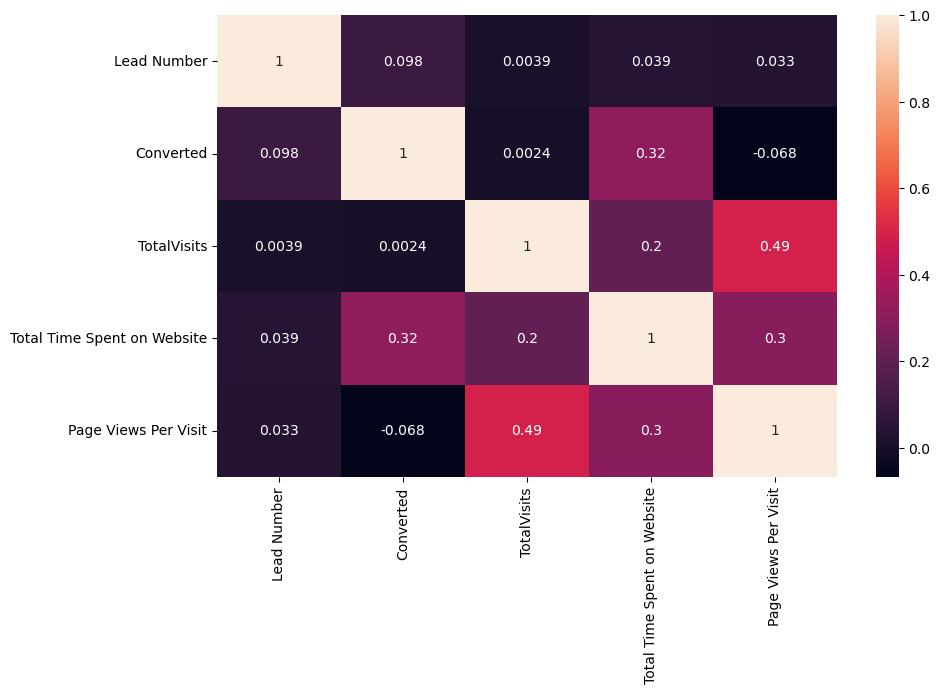

In [117]:
plt.figure(figsize=(10,6))
sns.heatmap(leads_df.corr(),annot=True)
plt.show()

# Step 4: Data Preprocessing

In [118]:
# The Country feature mostly consists of a single value thus dropping it
leads_df = leads_df.drop(['Country'], axis=1)

Creating Dummy Variables

In [119]:
leads_df.nunique()

Prospect ID                                      6550
Lead Number                                      6550
Lead Origin                                         5
Lead Source                                        16
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        38
Total Time Spent on Website                      1636
Page Views Per Visit                              107
Last Activity                                      16
What is your current occupation                     6
What matters most to you in choosing a course       3
Last Notable Activity                              14
dtype: int64

In [120]:
# Dummies to be created for all categorical columns which are having more than 2 unique values
dum_cols=["Lead Origin","Lead Source","Last Activity","What is your current occupation","What matters most to you in choosing a course","Last Notable Activity"]

In [121]:
dum=pd.get_dummies(leads_df[dum_cols],drop_first=True)
df=pd.concat([leads_df,dum],axis=1)

In [122]:
df=df.drop(dum_cols,axis=1)

In [123]:
df.shape

(6550, 62)

In [124]:
df.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,No,No,0,0.0,0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,No,No,0,5.0,674,2.5,0,0,...,1,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,No,No,1,2.0,1532,2.0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,No,No,0,1.0,305,1.0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,No,No,1,2.0,1428,1.0,1,0,...,0,0,0,1,0,0,0,0,0,0


Mapping categorical variables in 0 & 1 format

In [125]:
df["Do Not Email"]=df["Do Not Email"].map({"No":0,"Yes":1})
df["Do Not Call"]=df["Do Not Call"].map({"No":0,"Yes":1})

In [126]:
df.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,1,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [127]:
df.describe()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,...,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000
mean,616441.371908,0.070840,0.000305,0.487176,3.592061,540.627481,2.457710,0.556336,0.109618,0.007023,...,0.311756,0.000153,0.001985,0.320000,0.011603,0.032672,0.288397,0.003359,0.005038,0.000153
std,23431.020186,0.256576,0.017473,0.499874,4.987662,567.897857,2.145947,0.496854,0.312437,0.083514,...,0.463246,0.012356,0.044510,0.466512,0.107099,0.177790,0.453051,0.057862,0.070806,0.012356
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,595956.500000,0.000000,0.000000,0.000000,1.000000,35.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,614028.500000,0.000000,0.000000,0.000000,3.000000,293.000000,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,637324.250000,0.000000,0.000000,1.000000,5.000000,1030.000000,3.500000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,660737.000000,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [128]:
# Dropping the Prospect ID column as it was felt not important for the model building
df = df.drop(['Prospect ID'], axis=1)

# Train-test Split

In [129]:
X=df.drop("Converted",axis=1)
y=df[target_col]

In [130]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [131]:
print("Train X shape:",X_train.shape)
print("Test X shape:",X_test.shape)
print("Train y shape:",y_train.shape)
print("Test y shape:",y_test.shape)

Train X shape: (4585, 60)
Test X shape: (1965, 60)
Train y shape: (4585, 1)
Test y shape: (1965, 1)


# Scaling

In [132]:
# Performing the Min Max scaling on the Train and Test Dataset
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [133]:
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [134]:
X_train_scaled.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.041931,0.0,0.0,0.095652,0.261444,0.066727,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.979311,0.0,0.0,0.043478,0.102113,0.045455,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.099170,0.0,0.0,0.121739,0.801937,0.127273,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.657714,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.270319,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [135]:
X_test_scaled.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.302374,0.0,0.0,0.026087,0.112236,0.054545,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.978806,1.0,0.0,0.017391,0.102993,0.018182,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.382592,0.0,0.0,0.052174,0.078345,0.027273,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.364145,0.0,0.0,0.104348,0.062500,0.072727,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.395522,0.0,0.0,0.017391,0.554577,0.036364,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [136]:
X_train_scaled.describe()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,...,4585.000000,4585.0,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.0
mean,0.454147,0.073064,0.000218,0.030940,0.241468,0.044523,0.554853,0.107306,0.006543,0.000218,...,0.304471,0.0,0.001745,0.324973,0.011341,0.033806,0.288550,0.003708,0.005889,0.0
std,0.288331,0.260270,0.014768,0.035298,0.252426,0.039442,0.497036,0.309536,0.080633,0.014768,...,0.460233,0.0,0.041739,0.468416,0.105902,0.180749,0.453137,0.060785,0.076520,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.203524,0.000000,0.000000,0.008696,0.016725,0.018182,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.422738,0.000000,0.000000,0.026087,0.130282,0.036364,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.709953,0.000000,0.000000,0.043478,0.460827,0.061818,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


# Feature Selection

In [137]:
# performing Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

estimator=LogisticRegression()
selector=RFE(estimator,n_features_to_select=15)
selector.fit(X_train_scaled,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [138]:
# Features suggested by RFE
cols_to_keep=X_train_scaled.columns[selector.support_]
cols_to_keep

Index(['Lead Number', 'Do Not Email', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [139]:
list(zip(X_train_scaled.columns, selector.support_, selector.ranking_))

[('Lead Number', True, 1),
 ('Do Not Email', True, 1),
 ('Do Not Call', False, 13),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 36),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 35),
 ('Lead Origin_Quick Add Form', False, 14),
 ('Lead Source_Direct Traffic', False, 11),
 ('Lead Source_Facebook', False, 22),
 ('Lead Source_Google', False, 21),
 ('Lead Source_Live Chat', False, 39),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 20),
 ('Lead Source_Pay per Click Ads', False, 18),
 ('Lead Source_Press_Release', False, 45),
 ('Lead Source_Reference', False, 33),
 ('Lead Source_Referral Sites', False, 12),
 ('Lead Source_Social Media', False, 5),
 ('Lead Source_WeLearn', False, 29),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 19),
 ('Lead Source_testone', False, 42),
 ('Last Activity_Converted

In [140]:
# Keeping the Features selected by RFE
X_train=X_train_scaled[cols_to_keep]
X_test=X_test_scaled[cols_to_keep]

# Step 5: Model Building

In [141]:
import statsmodels.api as sm

In [142]:
model1=sm.GLM(np.array(y_train["Converted"]),(sm.add_constant(X_train)),family=sm.families.Binomial())
result1=model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4569
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2088.6
Date:                Tue, 21 Nov 2023   Deviance:                       4177.2
Time:                        07:21:49   Pearson chi2:                 4.93e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3774
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1330      0.589     -3.619      0.000      -3.288      -0.978
Lead Number                                              1.2292      0.137      8.955      0.000       0.960       1.498
Do Not Email                                            -1.2960      0.177     -7.326      0.000      -1.643      -0.949
TotalVisits                                              7.3768      1.535      4.805      0.000       4.368      10.386
Total Time Spent on Website                              4.3999      0.184     23.944      0.000       4.040       4.760
Page Views Per Visit                                    -4.5751      1.464     -3.125      0.002      -7.445      -1.705
Lead Origin_Lead Add Form                                3.4130      0.209     16.341      0.000       3.004       3.822
Lead Source_Olark Chat                                   1.3288      0.134      9.886      0.000       1.065       1.592
Lead Source_Welingak Website                             2.6262      1.028      2.554      0.011       0.610       4.642
Last Activity_SMS Sent                                   1.4913      0.086     17.440      0.000       1.324       1.659
What is your current occupation_Housewife               23.3656   2.39e+04      0.001      0.999   -4.69e+04    4.69e+04
What is your current occupation_Student                 -0.7049      0.615     -1.146      0.252      -1.911       0.501
What is your current occupation_Unemployed              -0.7372      0.577     -1.277      0.202      -1.869       0.395
What is your current occupation_Working Professional     1.8379      0.604      3.044      0.002       0.655       3.021
Last Notable Activity_Had a Phone Conversation          23.4055   2.33e+04      0.001      0.999   -4.56e+04    4.56e+04
Last Notable Activity_Unreachable                        2.8458      0.817      3.483      0.000       1.245       4.447
========================================================================================================================
"""

In [143]:
# Dropping What is your current occupation_Housewife due to high p value
X_train=X_train.drop(["What is your current occupation_Housewife"],axis=1)
X_test=X_test.drop(["What is your current occupation_Housewife"],axis=1)

In [144]:
model2=sm.GLM(np.array(y_train["Converted"]),(sm.add_constant(X_train)),family=sm.families.Binomial())
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4570
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2092.0
Date:                Tue, 21 Nov 2023   Deviance:                       4184.1
Time:                        07:21:50   Pearson chi2:                 4.93e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3765
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4675      0.523     -2.808      0.005      -2.492      -0.443
Lead Number                                              1.2270      0.137      8.943      0.000       0.958       1.496
Do Not Email                                            -1.3007      0.177     -7.348      0.000      -1.648      -0.954
TotalVisits                                              7.2610      1.525      4.761      0.000       4.272      10.250
Total Time Spent on Website                              4.3932      0.184     23.930      0.000       4.033       4.753
Page Views Per Visit                                    -4.5991      1.465     -3.140      0.002      -7.470      -1.728
Lead Origin_Lead Add Form                                3.4140      0.209     16.364      0.000       3.005       3.823
Lead Source_Olark Chat                                   1.3199      0.134      9.828      0.000       1.057       1.583
Lead Source_Welingak Website                             2.6177      1.028      2.545      0.011       0.602       4.633
Last Activity_SMS Sent                                   1.4906      0.085     17.436      0.000       1.323       1.658
What is your current occupation_Student                 -1.3615      0.554     -2.458      0.014      -2.447      -0.276
What is your current occupation_Unemployed              -1.3932      0.512     -2.722      0.006      -2.396      -0.390
What is your current occupation_Working Professional     1.1809      0.541      2.183      0.029       0.121       2.241
Last Notable Activity_Had a Phone Conversation          22.4079   1.41e+04      0.002      0.999   -2.76e+04    2.77e+04
Last Notable Activity_Unreachable                        2.8376      0.818      3.469      0.001       1.235       4.441
========================================================================================================================
"""

In [145]:
# Dropping Last Notable Activity_Had a Phone Conversation due to high p value
X_train = X_train.drop(["Last Notable Activity_Had a Phone Conversation"],axis=1)
X_test =  X_test.drop(["Last Notable Activity_Had a Phone Conversation"],axis=1)

In [146]:
model3=sm.GLM(np.array(y_train["Converted"]),(sm.add_constant(X_train)),family=sm.families.Binomial())
result3=model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4571
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2097.3
Date:                Tue, 21 Nov 2023   Deviance:                       4194.7
Time:                        07:21:50   Pearson chi2:                 4.94e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3750
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4687      0.523     -2.811      0.005      -2.493      -0.444
Lead Number                                              1.2254      0.137      8.949      0.000       0.957       1.494
Do Not Email                                            -1.3056      0.177     -7.378      0.000      -1.652      -0.959
TotalVisits                                              7.3401      1.528      4.803      0.000       4.345      10.336
Total Time Spent on Website                              4.3954      0.183     23.976      0.000       4.036       4.755
Page Views Per Visit                                    -4.6329      1.464     -3.164      0.002      -7.502      -1.763
Lead Origin_Lead Add Form                                3.4093      0.209     16.346      0.000       3.000       3.818
Lead Source_Olark Chat                                   1.3153      0.134      9.804      0.000       1.052       1.578
Lead Source_Welingak Website                             2.6181      1.028      2.546      0.011       0.603       4.634
Last Activity_SMS Sent                                   1.4832      0.085     17.367      0.000       1.316       1.651
What is your current occupation_Student                 -1.3578      0.554     -2.451      0.014      -2.443      -0.272
What is your current occupation_Unemployed              -1.3842      0.512     -2.705      0.007      -2.387      -0.381
What is your current occupation_Working Professional     1.1935      0.541      2.207      0.027       0.133       2.254
Last Notable Activity_Unreachable                        2.8290      0.818      3.459      0.001       1.226       4.432
========================================================================================================================
"""

Checking for Variance Inflation Factor:

In [147]:
# Calculating the VIF for the Features
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train.columns

vif_data["VIF"]=[variance_inflation_factor(X_train.values,i) \
                 for i in range(len(X_train.columns))]
vif_data

,Feature,VIF
0,Lead Number,3.612278
1,Do Not Email,1.102784
2,TotalVisits,2.910193
3,Total Time Spent on Website,2.342959
4,Page Views Per Visit,4.481284
5,Lead Origin_Lead Add Form,1.718888
6,Lead Source_Olark Chat,1.678261
7,Lead Source_Welingak Website,1.243373
8,Last Activity_SMS Sent,1.608264
9,What is your current occupation_Student,1.214822


In [148]:
# Dropping Features with VIF more than 5
X_train = X_train.drop(["What is your current occupation_Unemployed"],axis=1)
X_test =  X_test.drop(["What is your current occupation_Unemployed"],axis=1)

In [149]:
# Retraining the model
model4=sm.GLM(np.array(y_train["Converted"]),(sm.add_constant(X_train)),family=sm.families.Binomial())
result4=model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4572
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2101.3
Date:                Tue, 21 Nov 2023   Deviance:                       4202.5
Time:                        07:21:52   Pearson chi2:                 4.96e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3739
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.8398      0.131    -21.732      0.000      -3.096      -2.584
Lead Number                                              1.2089      0.137      8.849      0.000       0.941       1.477
Do Not Email                                            -1.3063      0.177     -7.389      0.000      -1.653      -0.960
TotalVisits                                              7.4631      1.539      4.849      0.000       4.446      10.480
Total Time Spent on Website                              4.3985      0.183     24.010      0.000       4.039       4.758
Page Views Per Visit                                    -4.5630      1.460     -3.125      0.002      -7.425      -1.701
Lead Origin_Lead Add Form                                3.4352      0.208     16.499      0.000       3.027       3.843
Lead Source_Olark Chat                                   1.3171      0.134      9.831      0.000       1.055       1.580
Lead Source_Welingak Website                             2.5908      1.028      2.520      0.012       0.575       4.606
Last Activity_SMS Sent                                   1.4677      0.085     17.243      0.000       1.301       1.635
What is your current occupation_Student                  0.0141      0.222      0.064      0.949      -0.420       0.448
What is your current occupation_Working Professional     2.5659      0.187     13.743      0.000       2.200       2.932
Last Notable Activity_Unreachable                        2.8368      0.814      3.484      0.000       1.241       4.433
========================================================================================================================
"""

In [150]:
# Dropping the "What is your current occupation_Student" Feature as it has high p value
X_train = X_train.drop(["What is your current occupation_Student"],axis=1)
X_test =  X_test.drop(["What is your current occupation_Student"],axis=1)

In [151]:
# Final Model
X_train_sm = sm.add_constant(X_train,has_constant="add")
model5=sm.GLM(np.array(y_train["Converted"]),X_train_sm,family=sm.families.Binomial())
result5=model5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4573
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2101.3
Date:                Tue, 21 Nov 2023   Deviance:                       4202.5
Time:                        07:21:52   Pearson chi2:                 4.96e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3739
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.8391      0.130    -21.809      0.000      -3.094      -2.584
Lead Number                                              1.2085      0.136      8.855      0.000       0.941       1.476
Do Not Email                                            -1.3065      0.177     -7.390      0.000      -1.653      -0.960
TotalVisits                                              7.4605      1.538      4.849      0.000       4.445      10.476
Total Time Spent on Website                              4.3985      0.183     24.011      0.000       4.039       4.758
Page Views Per Visit                                    -4.5614      1.460     -3.124      0.002      -7.423      -1.700
Lead Origin_Lead Add Form                                3.4356      0.208     16.505      0.000       3.028       3.844
Lead Source_Olark Chat                                   1.3176      0.134      9.849      0.000       1.055       1.580
Lead Source_Welingak Website                             2.5902      1.028      2.519      0.012       0.575       4.605
Last Activity_SMS Sent                                   1.4673      0.085     17.302      0.000       1.301       1.633
What is your current occupation_Working Professional     2.5654      0.187     13.753      0.000       2.200       2.931
Last Notable Activity_Unreachable                        2.8363      0.814      3.484      0.000       1.241       4.432
========================================================================================================================
"""

In [152]:
# VIF of the Final set of features
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train.columns

vif_data["VIF"]=[variance_inflation_factor(X_train.values,i) \
                 for i in range(len(X_train.columns))]
vif_data

,Feature,VIF
0,Lead Number,2.527409
1,Do Not Email,1.067483
2,TotalVisits,2.865026
3,Total Time Spent on Website,2.099057
4,Page Views Per Visit,3.875581
5,Lead Origin_Lead Add Form,1.543044
6,Lead Source_Olark Chat,1.210752
7,Lead Source_Welingak Website,1.242346
8,Last Activity_SMS Sent,1.476140
9,What is your current occupation_Working Profes...,1.210243


# Step 6: Evaluation

In [153]:
# Getting the Prediction Probabilities on Train Data
y_pred=result5.predict((sm.add_constant(X_train)))

In [154]:
train=pd.DataFrame(y_pred,columns=["Predicted_prob"])
train["Actual"]=y_train.values
train["Predicted_Class"]=np.where(train["Predicted_prob"]>0.5,1,0)
train.head()

,Predicted_prob,Actual,Predicted_Class
0,0.226323,0,0
1,0.251735,0,0
2,0.931058,1,1
3,0.677134,1,1
4,0.993177,1,1


In [155]:
# Calculating the Metrics on the Train Data
from sklearn import metrics
print("Accuracy =", metrics.accuracy_score(train["Actual"], train["Predicted_Class"]))
print("Recall =", metrics.recall_score(train["Actual"], train["Predicted_Class"]))
print("Precision =", metrics.precision_score(train["Actual"], train["Predicted_Class"]))

Accuracy = 0.7880043620501636
Recall = 0.7408246488445854
Precision = 0.8034398034398035


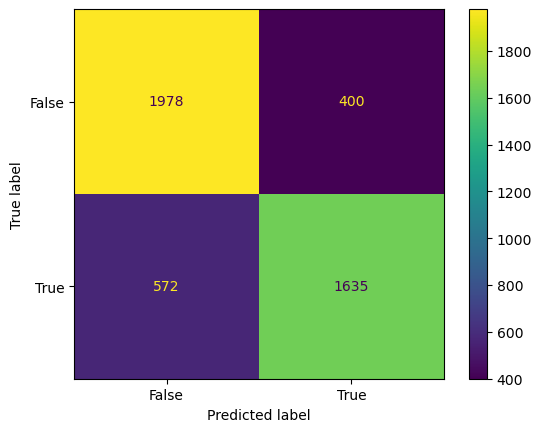

In [156]:
confusion_matrix_train=metrics.confusion_matrix(train["Actual"],train["Predicted_Class"])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_train, \
                                            display_labels = [False, True])
cm_display.plot()
plt.show()

In [157]:
# Printing the Train confusion matrix
print(confusion_matrix_train)

[[1978  400]
 [ 572 1635]]


In [158]:
# Checking the Overall Accuracy in Training
print(metrics.accuracy_score(train["Actual"], train["Predicted_Class"]))

0.7880043620501636


Calculating The Metrics

In [159]:
TP = confusion_matrix_train[1,1] # true positive
TN = confusion_matrix_train[0,0] # true negatives
FP = confusion_matrix_train[0,1] # false positives
FN = confusion_matrix_train[1,0] # false negatives

In [160]:
# sensitivity
TP/(TP+FN)

0.7408246488445854

In [161]:
# specificity
TN/(TN+FP)

0.8317914213624895

# Determining the Optimal Threshold

In [162]:
# ROC curve
fpr, tpr, thresholds = metrics.roc_curve( train["Actual"], train["Predicted_prob"], drop_intermediate = False )

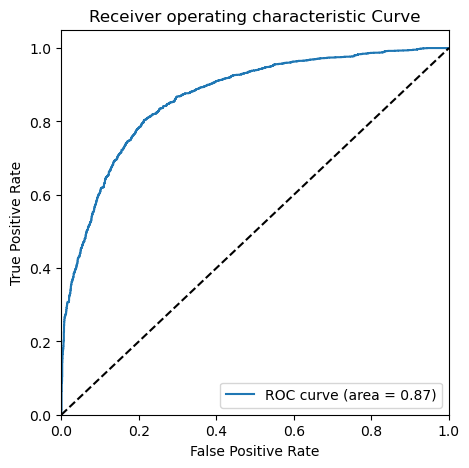

In [163]:
auc_score = metrics.roc_auc_score( train["Actual"], train["Predicted_prob"] )
plt.figure(figsize=(5, 5))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Curve')
plt.legend(loc="lower right")
plt.show()

In [164]:
probabilties = [float(x)/10 for x in range(10)]
for i in probabilties:
    train[i]= train.Predicted_prob.map(lambda x: 1 if x > i else 0)
train.head()

,Predicted_prob,Actual,Predicted_Class,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.226323,0,0,1,1,1,0,0,0,0,0,0,0
1,0.251735,0,0,1,1,1,0,0,0,0,0,0,0
2,0.931058,1,1,1,1,1,1,1,1,1,1,1,1
3,0.677134,1,1,1,1,1,1,1,1,1,0,0,0
4,0.993177,1,1,1,1,1,1,1,1,1,1,1,1


In [165]:
# Dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

prob = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in prob:
    cm1 = metrics.confusion_matrix(train.Actual, train[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy ,sensitivity, specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.481352     1.000000     0.000000
0.1          0.1  0.564885     0.988219     0.171993
0.2          0.2  0.696619     0.949252     0.462153
0.3          0.3  0.766412     0.883552     0.657696
0.4          0.4  0.790840     0.815134     0.768293
0.5          0.5  0.788004     0.740825     0.831791
0.6          0.6  0.771647     0.657454     0.877628
0.7          0.7  0.744602     0.560942     0.915055
0.8          0.8  0.705125     0.439511     0.951640
0.9          0.9  0.656707     0.303126     0.984861


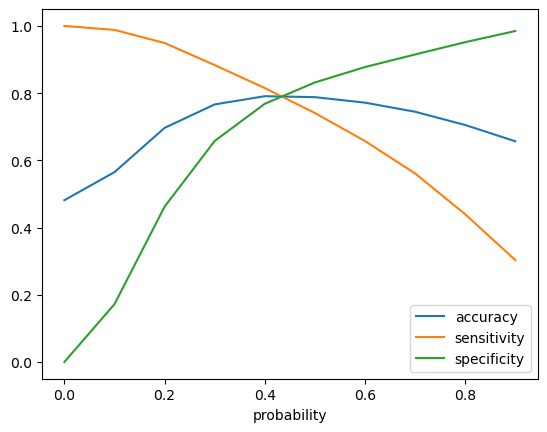

In [166]:
# Plotting the Accuracy, Sensitivity and Specificity for getting the optimal Threshold at their intersection
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

We will be taking the optimal threshold at 0.43

In [167]:
threshold = 0.43
train['final_predicted'] = train.Predicted_prob.map( lambda x: 1 if x > threshold else 0)
train.head()

,Predicted_prob,Actual,Predicted_Class,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.226323,0,0,1,1,1,0,0,0,0,0,0,0,0
1,0.251735,0,0,1,1,1,0,0,0,0,0,0,0,0
2,0.931058,1,1,1,1,1,1,1,1,1,1,1,1,1
3,0.677134,1,1,1,1,1,1,1,1,1,0,0,0,1
4,0.993177,1,1,1,1,1,1,1,1,1,1,1,1,1


In [168]:
# Accuracy on the Training Data
metrics.accuracy_score(train.Actual, train.final_predicted)

0.793020719738277

#Evaluating the model on Test data set

In [169]:
# Getting the Prediction Probabilities on Test Data
y_pred=result5.predict((sm.add_constant(X_test)))

In [170]:
threshold = 0.43
test=pd.DataFrame(y_pred,columns=["Predicted_prob"])
test["Actual"]=y_test.values
test['final_predicted'] = test.Predicted_prob.map( lambda x: 1 if x > threshold else 0)
test.head()

,Predicted_prob,Actual,final_predicted
0,0.361952,0,0
1,0.078506,0,0
2,0.145884,0,0
3,0.157448,0,0
4,0.818968,1,1


In [171]:
# Calculating the Metrics on the Test Data
from sklearn import metrics
print("Accuracy =", metrics.accuracy_score(test["Actual"], test["final_predicted"]))
print("Recall =", metrics.recall_score(test["Actual"], test["final_predicted"]))
print("Precision =", metrics.precision_score(test["Actual"], test["final_predicted"]))

Accuracy = 0.7867684478371502
Recall = 0.7713414634146342
Precision = 0.7964323189926548


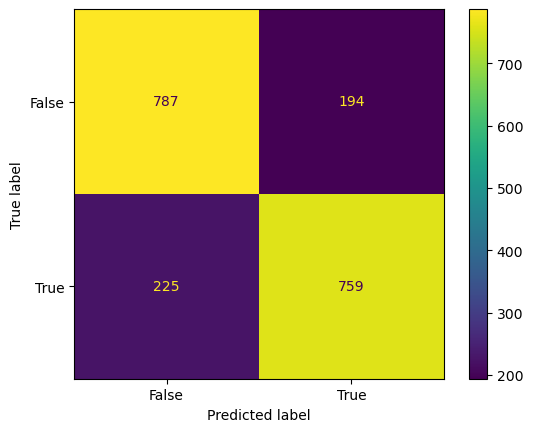

In [172]:
# Printing The Confusion Matrix for Test data
confusion_matrix_test=metrics.confusion_matrix(test["Actual"],test["final_predicted"])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test, \
                                            display_labels = [False, True])
cm_display.plot()
plt.show()